## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. 

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

**There are 69,889 rows and 3 columns in this dataset.**

In [3]:
# Finding the number of rows and columns
df.shape


(69889, 3)

`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

**The proportion of visits that converted is 0.1305.**

In [4]:
# Since the values for converted are 1 or 0, I can use the mean to find the proportion.

total_prob_convert = df['converted'].mean()
total_prob_convert

0.13047832992316388

`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

**There are no missing values in this dataset.**

In [5]:
# Descovering if there are null values
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [6]:
# number of visitors from each country - pull the necessary code from the next cell 
# to provide just the counts

df["country"].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

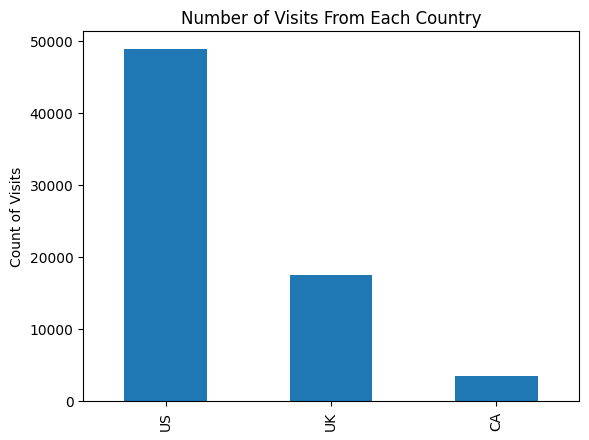

In [7]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

**The column 'converted' is an integer type and the other 2 are categorical.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**It makes sense that the only values for the 'converted' column are 0 and 1 because we want to compare True or False values to indicate if a visitor converted or not.**



In [9]:
# Finding the possible values for the 'converted' column.

print(df['converted'].unique())
df['converted'].nunique()

[0 1]


2

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

**The probability of an individual converting from the entire dataset.**

In [10]:
# This was calculated and stored in this variable.
total_prob_convert

0.13047832992316388

`b)` Given that an individual was in the `control` group, what is the probability they converted? 

**The probability that an individual from the control group converted is 0.1053.**

In [11]:
prob_convert_ctrl = df.query('group == "control"')['converted'].mean()
prob_convert_ctrl

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

**The probability that an indivdual from the treatment group converted is 0.1553.**

In [12]:
prob_convert_treatment = df.query('group == "treatment"')['converted'].mean()
prob_convert_treatment

0.15532078043793132

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

**There is some preliminary evidence that the treatment group has a higher conversion rate. We will need more analysis to reject the null hypothesis.**

`e)` What is the probability that an individual was in the `treatment`?

**The probability that an individual was in the treatment group is 0.5038.**

In [13]:
treatment_group = df.query('group == "treatment"')
num_vals_treatment = len(treatment_group)
prob_treatment_group = num_vals_treatment / df.shape[0]
prob_treatment_group

0.5038131894861853

`f)` What is the probability that an individual was from Canada `CA`?

**The probability that an individual was from Canada is 0.05.**

In [14]:
canada = df.query('country == "CA"')
num_vals_canada = len(canada)
prob_from_canada = num_vals_canada / df.shape[0]
prob_from_canada

0.04990771079855199

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$

**The probability that an individual was from the US and that they converted is 0.1328.**



In [15]:
# We are able to use the mean because the value for converted == 1.
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

**The probability that an individual was from the UK and that they converted is 0.1251.**

In [16]:
df.query('country =="UK"')['converted'].mean()

0.12512107572218106

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

**There appears to be a small difference between the conversion rate between the US and the UK. Further analysis is needed though.**

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

$P(\text{converted} == 1|(\text{country} ==\text{"UK" AND }\text{group} ==\text{"control"})) = 10.2\%$

$P(\text{converted} == 1|(\text{country} ==\text{"UK" AND }\text{group} ==\text{"treatment"})) = 14.9\%$

$P(\text{converted} == 1|(\text{country} ==\text{"CA" AND }\text{group} ==\text{"control"})) = 9.4\%$

$P(\text{converted} == 1|(\text{country} ==\text{"CA" AND }\text{group} ==\text{"treatment"})) = 15.4\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%      |  9.4%       |
| Treatment   | 15.8%       |  14.9%      | 15.4 %      |

In [17]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [18]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [19]:
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [20]:
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%      |  9.4%       |
| Treatment   | 15.8%       |  14.9%      |  15.4%      |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [21]:
total_prob_convert
# p_control_treatment_null  = df['converted'].mean()
num_in_treatment_grp = df.query('group == "treatment"').shape[0]
num_in_control_grp = df.query('group == "control"').shape[0]

print(total_prob_convert)
print(num_in_treatment_grp)
print(num_in_control_grp)

0.13047832992316388
35211
34678


 `b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [22]:
treatment_df = df.query('group == "treatment"')
treatment_sample = treatment_df.sample(num_in_treatment_grp, replace=True)
treatment_sample_converted = treatment_sample['converted']
print(treatment_sample_converted)
print(treatment_sample_converted.count())
treatment_sample_converted.mean()


15492    0
34656    0
36656    0
11496    0
12403    0
        ..
11851    0
14568    0
61287    0
2312     0
35334    0
Name: converted, Length: 35211, dtype: int64
35211


0.15353156683990798

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [23]:
control_df = df.query('group == "control"')
control_sample = control_df.sample(num_in_control_grp, replace=True)
control_sample_converted = control_sample['converted']
print(control_sample_converted)
print(control_sample_converted.count())
control_sample_converted.mean()

66167    0
33697    0
23349    0
34995    0
18790    0
        ..
26588    0
22625    0
45869    0
56938    0
46665    0
Name: converted, Length: 34678, dtype: int64
34678


0.10323548070823

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [24]:
p_treatment = treatment_sample_converted.mean()
p_control = control_sample_converted.mean()
print(p_treatment)
print(p_control)
diff_prob_convert = p_treatment - p_control
diff_prob_convert

0.15353156683990798
0.10323548070823


0.05029608613167798

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [25]:
num_sims = 500
p_diffs = []

for _ in range(num_sims):
    treatment_sample = treatment_df.sample(num_in_treatment_grp, replace=True)
    treatment_sample_converted = treatment_sample['converted'].mean()
    
    control_sample = control_df.sample(num_in_control_grp, replace=True)
    control_sample_converted = control_sample['converted'].mean()
    
    
    p_diffs.append(treatment_sample_converted - control_sample_converted)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<AxesSubplot: >

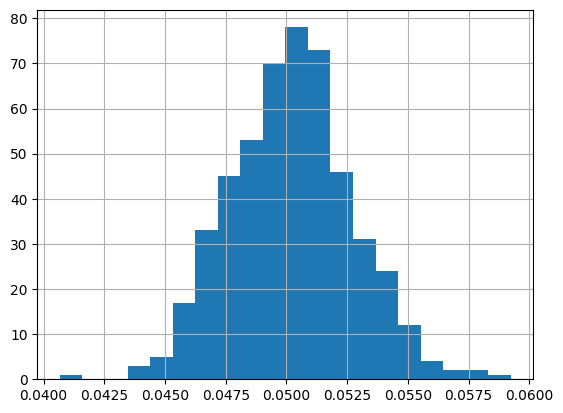

In [26]:
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

 `g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [27]:
(p_diffs > diff_prob_convert).mean()

0.488

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**The above value is know as the p-value and since it is higher than the 0.05 Type I error rate, we are not able to reject the null hypothesis.**

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the values are esentially True of False, we should use Logistic Regression in this case.**

In [28]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [29]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [30]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [31]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                0.007175
Time:                        00:49:59   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

**The p-value for ab_page is 0.000, which is below 0.05. Unlike the p-value in the Experiment, we could reject the null hypothsis using this logistic regression model.** 

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [32]:
### Create the necessary dummy variables
df[['US', 'UK', 'CA']] = pd.get_dummies(df['country'])
df = df.drop('CA', axis=1)
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,0,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [33]:
X2 = df[['intercept', 'ab_page', 'US', 'UK']]
y2 = df['converted']

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [34]:
log_mod2 = sm.Logit(y2, X2)
results2 = log_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Provide the summary of your model below.

In [35]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                0.007312
Time:                        00:50:04   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1203      0.019   -112.003      0.000      -2.157      -2.083
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
US            -0.0727      0.053     -1.372      0.170      -0.177       0.031
UK            -0.0660      0.026     -2.490      0.013      -0.118      -0.014
==============================================================================
"""

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**The p-value associated with 'US' is not statistically significant based on a value of 0.170, so we fail reject the null hypothesis. The p-value of 0.000 for 'UK' is statistically significant, so we can reject the null hypothesis**